### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [78]:
data = pd.read_csv('data/coupons.csv')

In [79]:
data.tail(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12584,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,1,0,0
12585,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,0,1,0
12586,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,1,0,0
12587,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,0
12588,Work,Alone,Snowy,30,7AM,Bar,1d,Male,21,Single,...,never,1~3,1~3,less1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [80]:
len(data)

12684

2. Investigate the dataset for missing or problematic data.

Change 1: It seems like the entire CarryAway column has a lot of NaN values. Let's look at the value counts.

In [81]:
data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

Change 2: It looks like not all the values are NaN and it looks like the NaN values represent 0 as none of the other values are zero or represet zero. 
Replacing all the Nan values with 0 seems to be the ideal choice.

Looking at the value counts of the 'toCoupon_GEQ5min' column, I find all the rows are 1.

In [145]:
data_1 = data.query('toCoupon_GEQ5min == 1')
data_1['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

Change 3: This means that all the restaurants are atleast 5 minutes away. Therefore, this column can be removed as it is redundant.

The values for 'toCoupon_GEQ15min' and 'toCoupon_GEQ25min' columns are not all ones, so no changes are required.

Taking a look at the 'coupon' column:

In [83]:
data['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

Everything looks fine.

Taking a look at the 'CoffeeHouse' column:

In [84]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

The 0 and never values are interchangeble. One could argue the less1 value is also the same, but I woudln't consider it the same category as the other two.

Change 4: Another thing I have noticed is a typo. The passenger column is named 'passanger'. Changing the column name seems to be the ideal choice.

3. Decide what to do about your missing data -- drop, replace, other...

I have implemented all the following change from part 2 below.

In [85]:
# Replacing the NaN values in the 'CarryAway' column with 0.
data.fillna(0)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [86]:
#Changing the never values in the 'CoffeeHouse' column to 0
#data['CoffeeHouse'].replace('never', 0, inplace = True)

In [87]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

Changing the name of the 'passanger column'

In [88]:
data = data.rename(columns={'passanger': 'passenger'})

4. What proportion of the total observations chose to accept the coupon? 



To find the proportion of observations that have accepted the coupon, the value_count function would be useful.

In [89]:
data['Y'].value_counts(1)

1    0.568433
0    0.431567
Name: Y, dtype: float64

Around %56.8433 of the total observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:>

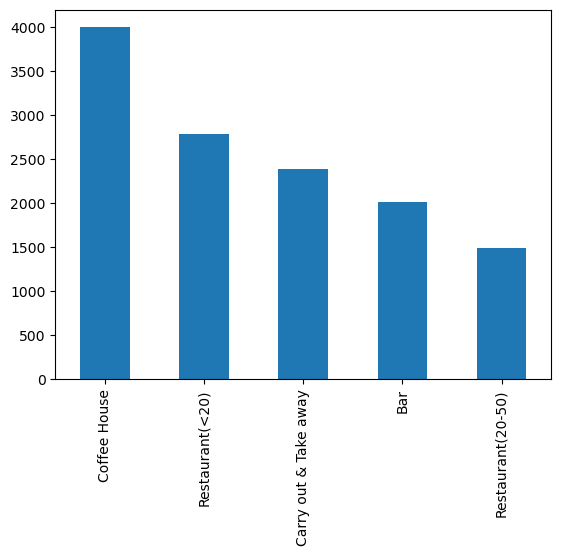

In [90]:
#making a bar plot for the coupon column
coupon_value_counts = data['coupon'].value_counts()
coupon_value_counts.plot(kind = 'bar')

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

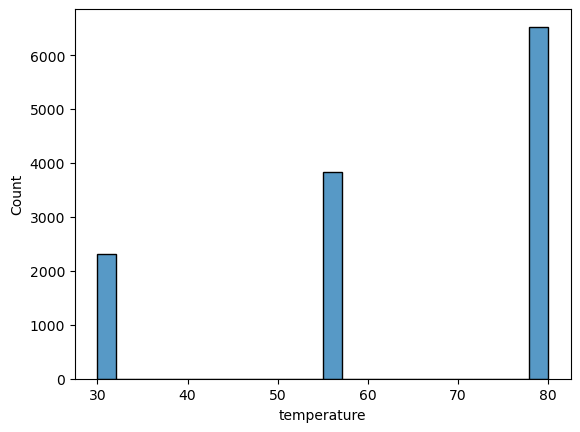

In [91]:
#creating a histogram for the temperatue column
sns.histplot(data = data, x = 'temperature')

The temperatures are not a continuous distrubtion or a normal distribution. A count plot would be better suited to visualize the different temperatures.

<AxesSubplot:xlabel='temperature', ylabel='count'>

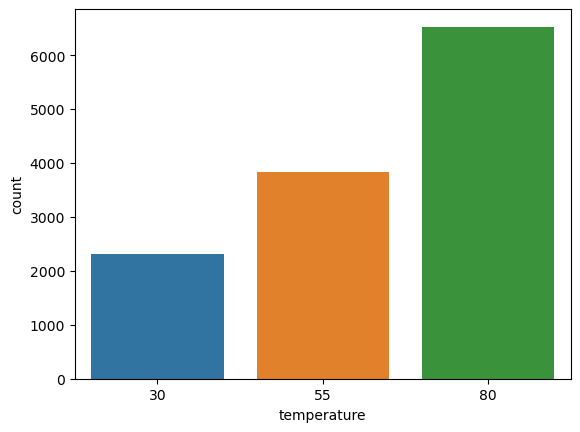

In [92]:
#plotting a count plot for the temperature column
sns.countplot(data = data, x = 'temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


To get a data frame with only the bar coupons, I have used the query function.

In [93]:
data_bar_coupon = data.query("coupon == 'Bar'")
data_bar_coupon.head()
#len(data_bar_coupon)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


To find the proportion of the bar coupons that were accepted, the value_counts function can be used.

In [94]:
data_bar_coupon['Y'].value_counts(1)

0    0.589985
1    0.410015
Name: Y, dtype: float64

Around %41.0015 of the bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


To get the data of the observations that went to a bar 3 or fewer times, the query function can be used. The less than or equal to 3 visits includes the never, less1, and 1~3 values in the dataframe.

In [95]:
data_bar_less_than_three = data_bar_coupon.query('Bar == "1~3" or Bar == "never" or Bar == "less1"')
data_bar_less_than_three['Bar']
data_bar_less_than_three['Bar'].value_counts()
len(data_bar_less_than_three)

1797

The 4~8 and gt8 values represent the observations that go to the bar more than 3 times a month.

In [96]:
data_bar_more_than_three = data_bar_coupon.query('Bar == "4~8" or Bar == "gt8"')
data_bar_more_than_three['Bar'].value_counts()
len(data_bar_more_than_three)

199

Now, to look at the coupon acceptance rates, I will use the value_counts function on both the datasets.

In [97]:
#Acceptance rate for less than or equal to 3 visits
print('Coupon acceptance rate for less than or equal to three visits:')
print(data_bar_less_than_three['Y'].value_counts(1))
#Acceptance rate for more than 3 visits
print('Coupon acceptance rate for more than three visits:')
print(data_bar_more_than_three['Y'].value_counts(1))

Coupon acceptance rate for less than or equal to three visits:
0    0.629382
1    0.370618
Name: Y, dtype: float64
Coupon acceptance rate for more than three visits:
1    0.768844
0    0.231156
Name: Y, dtype: float64


The acceptance rates for the coupon is much lower for the observations that go to the bar three or less times a month
with an %37.0618 acceptance rate as opposed to the %76.8844 acceptance rate for the observations that go the the bar
more than 3 times a month.


Note: Some of the Bar column values are NaN, 21 to be precise. I haven't changed them or replaced them because I don't think there is an ideal replacement for the values.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


from what I understand, the question is asking about the acceptance rate of all the coupons not just the bar ones. To see how the age data is formatted, I will use the value_counts function. Another thing I have noticed is that the question is asking for the acceptance for drivers who go to a bar MORE than once a month. Unfortunately, it is not possible to get the required dataset because there is a 1~3 value which represents both people that go to a bar between once and thrice a month.  

In [98]:
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

The 26, 31, 50plus, 36, 41, 46 values are what we need. So, I will filter for all ages except 21 and below21.
To get the required dataset, I will use the query function.

In [99]:
data_bar_frequent_and_over_25 = data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (age != "21" and age!= "below21")')
data_bar_frequent_and_over_25['Bar'].value_counts()
data_bar_frequent_and_over_25['age'].value_counts()
len(data_bar_frequent_and_over_25)

2777

To get "the all others" the question is talking about, we need to get the observations that are either under the age of 25 OR visit the bar less than 1 time a month.

In [100]:
data_bar_remaining = data.query('(Bar == "never" or Bar == "less1") or (age == "21" or age == "below21")')
data_bar_remaining['Bar'].value_counts()
data_bar_remaining['age'].value_counts()
len(data_bar_remaining)

9806

Now that I have the required dataframes, I will use the value_count function on both the dataframes to get the coupon
acceptance percentage.

In [101]:
#Acceptance rate for more than or equal to 1 visits
print('Coupon acceptance rate for drivers that visit a bar more than once a month and are over the age of 25:')
print(data_bar_frequent_and_over_25['Y'].value_counts(1))
#Acceptance rate for more than 3 visits
print('Coupon acceptance rate for the rest of the drivers:')
print(data_bar_remaining['Y'].value_counts(1))

Coupon acceptance rate for drivers that visit a bar more than once a month and are over the age of 25:
1    0.621534
0    0.378466
Name: Y, dtype: float64
Coupon acceptance rate for the rest of the drivers:
1    0.554049
0    0.445951
Name: Y, dtype: float64


The acceptance rate for dirvers that visit a bar more than once a month is %62.1534.
The acceptance rate for the remaining drivers in the dataset in %55.4049.
There is an 8 percent difference between the two groups.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


First thing I need to do is look at the different kind of occupations and the different kind of passengers.

In [102]:
data['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [103]:
data['passenger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passenger, dtype: int64

Looks like the farming, fishing and forestry make up one value in the dataset.
To get the dataset required, I will use the query function.
Also, I am unsure if passengers that are not a kid inlcudes the alone category, but I will include it anyway.

In [104]:
data_no_fishing_farming_forestry_no_kids_frequent_bar = data.query('(occupation != "Farming Fishing & Forestry") and passenger != "Kid(s)" and (Bar == "1~3" or Bar == "4~8" or Bar == "gt8")')
len(data_no_fishing_farming_forestry_no_kids_frequent_bar)

3696

Now, to get the rest of the data

In [105]:
data_no_fishing_farming_forestry_no_kids_frequent_bar_opposite = data.query('(occupation == "Farming Fishing & Forestry") or passenger == "Kid(s)" or (Bar != "1~3" and Bar != "4~8" and Bar != "gt8")')
len(data_no_fishing_farming_forestry_no_kids_frequent_bar_opposite)

8988

Now that we have both the required filtered datasets, we can use the value_counts function to find the acceptance rate for coupons.

In [106]:
print("Acceptance rate for the specified observstions:")
print(data_no_fishing_farming_forestry_no_kids_frequent_bar['Y'].value_counts(1))
print("Acceptance rate for everybody else:")
print(data_no_fishing_farming_forestry_no_kids_frequent_bar_opposite['Y'].value_counts(1))

Acceptance rate for the specified observstions:
1    0.623106
0    0.376894
Name: Y, dtype: float64
Acceptance rate for everybody else:
1    0.54595
0    0.45405
Name: Y, dtype: float64


The acceptance rate for the specified observations is %62.3106 while the acceptance rate for everybody else is %54.595.
The acceptance rate for the specified observations is around 8 percent higher than everybody else.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



From what I understand from the question, I am supposed to compare the acceptance rates between the three categories listed.

Category 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed.

Category 2: go to bars more than once a month and are under the age of 30.

Category 3: go to cheap restaurants more than 4 times a month and income is less than 50K.

Category 1 Dataset:

In [113]:
data_category_1 = data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (passenger == "Alone" or passenger == "Partner" or passenger == "Friend(s)") and (maritalStatus != "Widowed")')
len(data_category_1)
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

Category 2 Dataset:

In [108]:
data_category_2 = data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (age == "21" or age == "26" or age == "below21")')
len(data_category_2)

2272

Category 3 Dataset:

In [109]:
data_category_3 = data.query('(income == "$25000 - $37499" or income == "$12500 - $24999" or income == "$37500 - $49999") and (RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8")')
len(data_category_3)
#data['RestaurantLessThan20'].value_counts()

1820

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Looking at the correlation between temperature and coupon acceptance

First, let's look at the different type of temperatures in the dataframe

In [114]:
data['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

There are only three different temperature values. Let's make three dataframes for the three tempereatures.

In [121]:
data_temp_80 = data.query('temperature == 80')
data_temp_55 = data.query('temperature == 55')
data_temp_30 = data.query('temperature == 30')

Now, let's look at the different acceptance rates.

In [125]:
print("Coupon acceptance rate for 80 degree weather:")
print(data_temp_80['Y'].value_counts(1))
print("Coupon acceptance rate for 55 degree weather:")
print(data_temp_55['Y'].value_counts(1))
print("Coupon acceptance rate for 30 degree weather:")
print(data_temp_30['Y'].value_counts(1))

Coupon acceptance rate for 80 degree weather:
1    0.600337
0    0.399663
Name: Y, dtype: float64
Coupon acceptance rate for 55 degree weather:
1    0.536719
0    0.463281
Name: Y, dtype: float64
Coupon acceptance rate for 30 degree weather:
1    0.531088
0    0.468912
Name: Y, dtype: float64


The acceptance rate for the coupons is highest when the weather is 80 degrees and about the same for both 55 degree weather
and 30 degree weather. 

# Looking at the correlation between time from restaurant/bar and coupon acceptance

In [131]:
data_coupon_15_min = data.query('toCoupon_GEQ15min == 1')
data_coupon_15_min['toCoupon_GEQ15min'].value_counts()

1    7122
Name: toCoupon_GEQ15min, dtype: int64

In [132]:
data_coupon_25_min = data.query('toCoupon_GEQ25min == 1')
data_coupon_25_min['toCoupon_GEQ25min'].value_counts()

1    1511
Name: toCoupon_GEQ25min, dtype: int64

Now that I have the required dataframes, I will use the value_counts() function to find the coupon acceptance rates.

In [148]:
print("Coupon acceptance rate for locations 15 to 25 minutes from the driver:")
print(data_coupon_15_min['Y'].value_counts(1))
print("Coupon acceptance rate for locations 25 minutes or more from the driver:")
print(data_coupon_25_min['Y'].value_counts(1))

Coupon acceptance rate for locations 15 to 25 minutes from the driver:
1    0.532716
0    0.467284
Name: Y, dtype: float64
Coupon acceptance rate for locations 25 minutes or more from the driver:
0    0.571145
1    0.428855
Name: Y, dtype: float64


The coupon acceptance rate for the 15 to 25 minutes observations is %53.2716 while the coupon acceptance rate for
the 25 minutes or more observations is %42.8855.

# Correlation between expiration date and coupon acceptance rate.

First, let's look at the kind of values the expiration column has in the form of a graph.

<AxesSubplot:xlabel='expiration', ylabel='Count'>

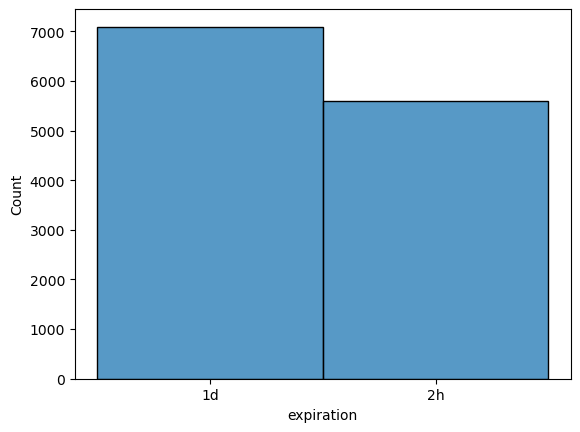

In [151]:
sns.histplot(data = data, x = 'expiration')

There are around 7000 coupons that expire in 1 day and around 5500 coupons that expire in 2 hours.
Now, let's look at the acceptance rates for these two different types of coupons.
To do that, we need the right dataframes which I will make below.

In [152]:
data_coupon_1day = data.query('expiration == "1d"')
data_coupon_2h = data.query('expiration == "2h"')

In [154]:
print("Coupon acceptance rate for coupons that expire in 1 day:")
print(data_coupon_1day['Y'].value_counts(1))
print("Coupon acceptance rate for coupons that expire in 2 hours:")
print(data_coupon_2h['Y'].value_counts(1))

Coupon acceptance rate for coupons that expire in 1 day:
1    0.625582
0    0.374418
Name: Y, dtype: float64
Coupon acceptance rate for coupons that expire in 2 hours:
0    0.504023
1    0.495977
Name: Y, dtype: float64


The acceptance rate for the coupons that expire in 1 day is %62.5582. The acceptance rate for coupons that expire in 2h
is lower at %49.5977.

Now, I'll look at the coupon acceptance rate between coupons that expire in 2h AND are 15 minutes away from the driver
and the coupons that expire in 1 day AND are 25 minutes away from the driver. The first thing I need to do is get the right dataframes.

In [173]:
data_2h_and_15min = data.query('expiration == "2h" and toCoupon_GEQ15min == 1')
data_1d_and_25min = data.query('expiration == "1d" and toCoupon_GEQ25min == 1')

Now that I have the dataframes, I will compare the coupon acceptance rates.

In [172]:
print("The coupon acceptance rate for the coupons that expire in 2 hours and where the driver is 15 minutes away from the destination:")
print(data_2h_and_15min['Y'].value_counts(1))
print("The coupon acceptance rate for the coupons that expire in 1 day and where the driver is 25 minutes or more away from the destination:")
print(data_1d_and_25min['Y'].value_counts(1))

The coupon acceptance rate for the coupons that expire in 2 hours and where the driver is 15 minutes away from the destination:
0    0.522908
1    0.477092
Name: Y, dtype: float64
The coupon acceptance rate for the coupons that expire in 1 day and where the driver is 25 minutes or more away from the destination:
1    0.517544
0    0.482456
Name: Y, dtype: float64


The coupon acceptance rate for the coupons that expire in 2 hours and where the driver is 15 minutes away from the destination is %47.7092.
The coupon acceptance rate for the coupons that expire in 1 day and where the driver is 25 minutes or more away from the destination is %51.7544.

Unsurprisingly, the coupon acceptance rate for coupons that expire in 1 day is higher than the acceptance rate for
coupons that expire in 1 day and are 25 minutes or more from the dirver's destination.
For the coupons that expire in 2 hours, the acceptance rate is lower overall than when you only look at the acceptance rate when the driver is 15 minutes away from the location.

Now, I'll also look at the acceptance rates for coupons that expire in 2 hours and are 25 minutes away from the driver
and the coupons that expire in 1 day and are 15 minutes away from the driver.

In [168]:
data_1d_and_15min = data.query('expiration == "1d" and toCoupon_GEQ15min == 1')
data_2h_and_25min = data.query('expiration == "2h" and toCoupon_GEQ25min == 1')

Now that I have the dataframes, I will compare the coupon acceptance rates.

In [170]:
print("The coupon acceptance rate for the coupons that expire in 1 day and where the driver is 15 minutes away from the destination:")
print(data_1d_and_15min['Y'].value_counts(1))
print("The coupon acceptance rate for the coupons that expire in 2 hours and where the driver is 25 minutes or more away from the destination:")
print(data_2h_and_25min['Y'].value_counts(1))

The coupon acceptance rate for the coupons that expire in 1 day and where the driver is 15 minutes away from the destination:
1    0.580042
0    0.419958
Name: Y, dtype: float64
The coupon acceptance rate for the coupons that expire in 2 hours and where the driver is 25 minutes or more away from the destination:
0    0.706177
1    0.293823
Name: Y, dtype: float64


The coupon acceptance rate for the coupons that expire in 1 day and where the driver is 15 minutes away from the destination is %58.0042.
The coupon acceptance rate for the coupons that expire in 2 hours and where the driver is 25 minutes or more away from the destination is %29.3823.

An interesting observation I have made is that the coupon acceptance rate for coupons that expire in 2 hours where the driver is 
25 minutes or more away is much lower than the coupon acceptance rate for coupons that expire in 2 hours and where the driver is
15 minutes away (%29.3283 as opposed to %47.7092, around a %18 difference). The extra time for travel makes a big difference in the coupona acceptance rate.

On the other hand, the coupon acceptance rate is much closer for the coupons that expire in 1 day and the driver is 25 minutes or more away and the coupons that expire in 1 day and the driver is 15 miutes away (%51.7544 as opposed to %58.0042, around a %7.25 difference. Less than half the difference of the coupons that expire in 2 hours).

Overall, the acceptance rate is higher for the coupons that expire in 1 day.

From this data, one could conclude that if a business (food) wants a high coupon acceptance rate, the ideal choice would be to make a coupon that expires in 1 day rather than a coupon that expires in 2 hours.

Another conclusion is that it is ideal to give coupons to customers that live close to the business.
